In [1]:
import sys
sys.path.append('../')
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)

In [2]:
ibex = yf.Ticker("^IBEX")

# get historical market data from the Dow Jones index
ibex = ibex.history(period="max")
ibex = ibex['Close']

ibex.head()

Date
1993-07-12    2826.396973
1993-07-13    2843.396973
1993-07-14    2851.097168
1993-07-15    2843.697021
1993-07-16    2830.497070
Name: Close, dtype: float64

In [3]:
fchi = yf.Ticker("^FCHI")

# get historical market data from the NASDAQ index
fchi = fchi.history(period="max")
fchi = fchi['Close']

fchi.head()

Date
1990-03-01    1832.0
1990-03-02    1860.0
1990-03-05    1874.0
1990-03-06    1872.0
1990-03-07    1880.0
Name: Close, dtype: float64

In [4]:
data = pd.merge(ibex, fchi, left_index=True, right_index=True, suffixes=('_ibex', '_fchi'))
data.head()

,Close_ibex,Close_fchi
Date,,
1993-07-12,2826.396973,1992.199951
1993-07-13,2843.396973,1991.199951
1993-07-15,2843.697021,1963.099976
1993-07-16,2830.497070,1974.900024
1993-07-19,2822.197021,1981.699951


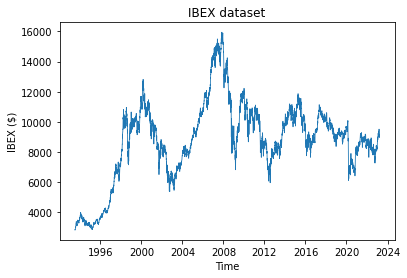

In [5]:
a = plt.plot(data['Close_ibex'], linewidth=0.8, alpha=1)
a = plt.xlabel('Time')
a= plt.ylabel('IBEX ($)')
a = plt.title('IBEX dataset')
resolution_value = 600
plt.savefig("IBEX.png", format="png", dpi=resolution_value)

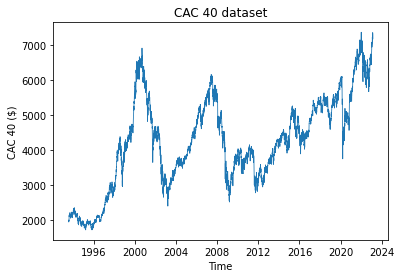

In [6]:
a = plt.plot(data['Close_fchi'], linewidth=0.8, alpha=1)
a = plt.xlabel('Time')
a= plt.ylabel('CAC 40 ($)')
a = plt.title('CAC 40 dataset')
resolution_value = 600
plt.savefig("CAC 40.png", format="png", dpi=resolution_value)

In [7]:
data.index = pd.DatetimeIndex(data.index)

In [8]:
data_test = data[(pd.DatetimeIndex(data.index).year >= 2015) & (pd.DatetimeIndex(data.index).year < 2020)]
data_train = data[(pd.DatetimeIndex(data.index).year < 2015)]

In [9]:
pre_train = torch.tensor(np.array(data_train[['Close_ibex', 'Close_fchi']])).unsqueeze(0)
pre_test = torch.tensor(np.array(data_test[['Close_ibex', 'Close_fchi']])).unsqueeze(0)

In [10]:
n_x, n_y = 30, 15
train = []
for i in range(0, pre_train.shape[1]-n_x-n_y):
    try:
        train.append(torch.tensor(pre_train[:, i:(i+n_x+n_y), :]))
    except:
        pass

train = torch.cat(train, dim=0)

test = []
for i in range(0, pre_test.shape[1]-n_x-n_y):
    try:
        test.append(torch.tensor(pre_test[:, i:(i+n_x+n_y), :]))
    except:
        pass

test = torch.cat(test, dim=0)

C:\Users\pere9\AppData\Local\Temp\ipykernel_19356\2442606705.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train.append(torch.tensor(pre_train[:, i:(i+n_x+n_y), :]))
C:\Users\pere9\AppData\Local\Temp\ipykernel_19356\2442606705.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test.append(torch.tensor(pre_test[:, i:(i+n_x+n_y), :]))


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, val = train_test_split(train, test_size=0.20, random_state=42)

In [13]:
train.shape, val.shape, test.shape

(torch.Size([4262, 45, 2]),
 torch.Size([1066, 45, 2]),
 torch.Size([1231, 45, 2]))

In [14]:
data = {}

In [15]:
data['X_train'], data['Y_train'] = train[:, :n_x, :].float(), train[:, (n_x-1):, :2].float()
data['X_val'], data['Y_val'] = val[:, :n_x, :].float(), val[:, (n_x-1):, :2].float()
data['X_test'], data['Y_test'] = test[:, :n_x, :].float(), test[:, (n_x-1):, :2].float()

In [16]:
data['X_train'] = torch.cat([torch.arange(0, data['X_train'].shape[1]).repeat(
    data['X_train'].shape[0], 1).unsqueeze(2), data['X_train']], dim=2)

data['Y_train'] = torch.cat([torch.arange(0, data['Y_train'].shape[1]).repeat(
    data['Y_train'].shape[0], 1).unsqueeze(2), data['Y_train']], dim=2)

data['X_val'] = torch.cat([torch.arange(0, data['X_val'].shape[1]).repeat(
    data['X_val'].shape[0], 1).unsqueeze(2), data['X_val']], dim=2)

data['Y_val'] = torch.cat([torch.arange(0, data['Y_val'].shape[1]).repeat(
    data['Y_val'].shape[0], 1).unsqueeze(2), data['Y_val']], dim=2)

data['X_test'] = torch.cat([torch.arange(0, data['X_test'].shape[1]).repeat(
    data['X_test'].shape[0], 1).unsqueeze(2), data['X_test']], dim=2)

data['Y_test'] = torch.cat([torch.arange(0, data['Y_test'].shape[1]).repeat(
    data['Y_test'].shape[0], 1).unsqueeze(2), data['Y_test']], dim=2)

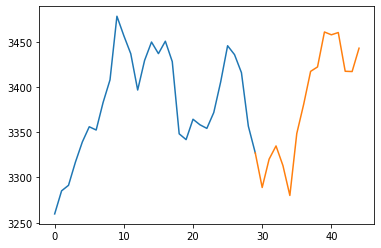

In [17]:
plt.plot(data['X_train'][0, :, 1])
plt.plot(data['X_train'][0, -1, 0]+data['Y_train'][0, :, 0], data['Y_train'][0, :, 1])

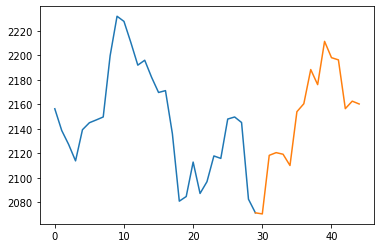

In [18]:
plt.plot(data['X_train'][0, :, 2])
plt.plot(data['X_train'][0, -1, 0]+data['Y_train'][0, :, 0], data['Y_train'][0, :, 2])

In [19]:
# We normalize the data
mean_ibex, std_ibex = data['X_train'][:, :, 1].mean(), data['X_train'][:, :, 1].std()
mean_fchi, std_fchi = data['X_train'][:, :, 2].mean(), data['X_train'][:, :, 2].std()

for dataset in data:
    data[dataset][:, :, 1] = (data[dataset][:, :, 1]-mean_ibex)/std_ibex
    
for dataset in data:
    data[dataset][:, :, 2] = (data[dataset][:, :, 2]-mean_fchi)/std_fchi

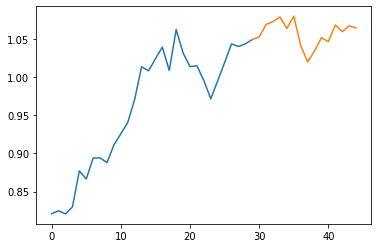

In [20]:
i=100
plt.plot(data['X_train'][i, :, 1])
plt.plot(data['X_train'][0, -1, 0]+data['Y_train'][0, :, 0], data['Y_train'][i, :, 1])

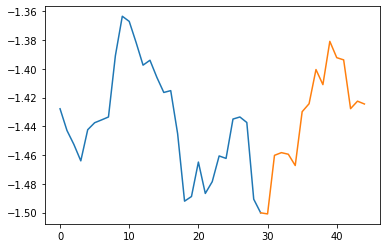

In [21]:
plt.plot(data['X_train'][0, :, 2])
plt.plot(data['X_train'][0, -1, 0]+data['Y_train'][0, :, 0], data['Y_train'][0, :, 2])

In [22]:
stats = {'mean_ibex': mean_ibex, 'std_ibex': std_ibex, 'mean_fchi': mean_fchi, 'std_fchi': std_fchi}

In [23]:
torch.save(stats, 'stats_data.pt')

In [24]:
torch.save(data, 'data.pt')

### Some data analysis

In [25]:
stats_data = torch.load('stats_data.pt')

In [26]:
stats_data

{'mean_ibex': tensor(8706.8516),
 'std_ibex': tensor(3007.4143),
 'mean_fchi': tensor(3830.5837),
 'std_fchi': tensor(1172.5850)}

In [27]:
x_ibex = data['X_train'][:, -1:, 1:2]*stats_data['std_ibex']+stats_data['mean_ibex']
y_ibex = data['Y_train'][:, 1:, 1:2]*stats_data['std_ibex']+stats_data['mean_ibex']

x_fchi = data['X_train'][:, -1:, 2:]*stats_data['std_fchi']+stats_data['mean_fchi']
y_fchi = data['Y_train'][:, 1:, 2:]*stats_data['std_fchi']+stats_data['mean_fchi']

In [28]:
inc_ibex = torch.ones(y_ibex.shape)*x_ibex
inc_ibex_ = (y_ibex-inc_ibex)/inc_ibex
inc_max_ibex = torch.max(inc_ibex_, dim=1)[0].squeeze(1)

inc_fchi = torch.ones(y_fchi.shape)*x_fchi
inc_fchi_ = (y_fchi-inc_fchi)/inc_fchi
inc_max_fchi = torch.max(inc_fchi_, dim=1)[0].squeeze(1)

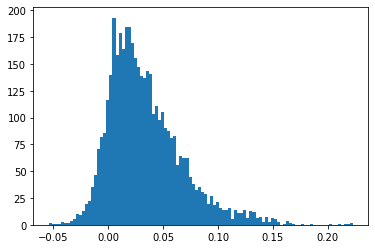

In [29]:
a = plt.hist(inc_max_ibex.numpy(), bins=100)

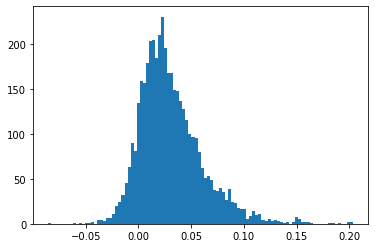

In [30]:
a = plt.hist(inc_max_fchi.numpy(), bins=100)

In [31]:
np.quantile(inc_max_ibex, 0.95)

0.09939814694225785

In [32]:
np.quantile(inc_max_fchi, 0.95)

0.08642624020576477

In [33]:
inc_min_ibex = torch.min(inc_ibex_, dim=1)[0].squeeze(1)
inc_min_fchi = torch.min(inc_fchi_, dim=1)[0].squeeze(1)

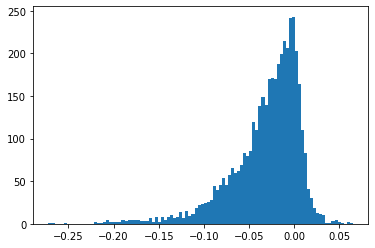

In [34]:
a = plt.hist(inc_min_ibex.numpy(), bins=100)

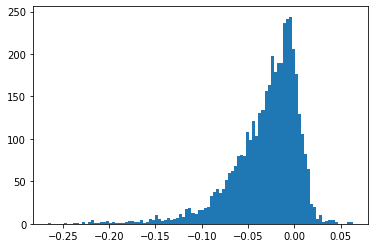

In [35]:
a = plt.hist(inc_min_fchi.numpy(), bins=100)

In [36]:
np.quantile(inc_min_ibex, 0.05)

-0.10458122789859771

In [37]:
np.quantile(inc_min_fchi, 0.05)

-0.09875093586742877